# Normal Distribution(正規分布) : 連続

## 確率密度関数
$$
f(X)=\frac{1}{\sqrt{2\pi\sigma^2}} exp\left[{-\frac{(x-\mu)^2}{2\sigma^2}}\right]
$$

モーメント母関数
$$
M_X(t) = e^{t\mu+\frac{\sigma^2t^2}{2}}
$$

期待値$$E[X] = \mu$$ 分散$$V[X] = \sigma^2$$

共役事前分布  
- 母分散既知 : 正規分布
- 母分散未知 : 逆ガンマ分布

再生性 : あり

## 確率密度関数のグラフ

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

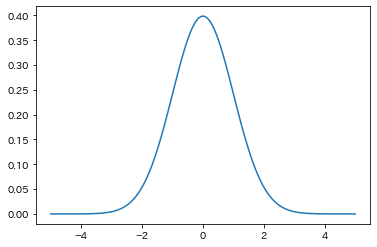

In [27]:
mu,sigma = 0,1
xscale = np.linspace(-5,5,100)

prob = stats.norm.pdf(xscale,mu,sigma) # 期待値 標準偏差

plt.figure(facecolor="white")
plt.plot(xscale,prob)
plt.show()

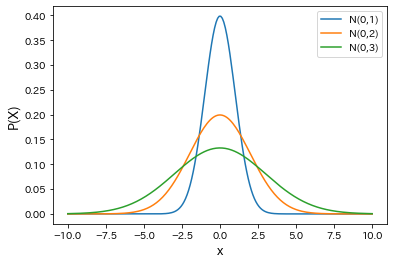

Expected value : [0, 0, 0]
Variance : [1, 2, 3]
Skewness : [2.191160239231794, 1.1166715498670836, 0.5398539341406556]
Kurtosislist : [3.4343851363697437, -0.2939893357268075, -1.2469371349153455]


In [29]:
mulist=[0,0,0]
vlist=[1,2,3]
width=[-10,10] # 表示幅調整

xscalelist = []
problist = []
skewlist = []
kurtosislist = []
for i in range(len(mulist)):
    sigma=vlist[i]/2
    xscalelist.append(np.linspace(width[0],width[1],200))
    problist.append(stats.norm.pdf(xscalelist[i],mulist[i],vlist[i]))
    skewlist.append(stats.skew(problist[i]))
    kurtosislist.append(stats.kurtosis(problist[i]))
    
plt.figure(facecolor="white")
for i in range(len(mulist)):
    plt.plot(xscalelist[i],problist[i],label="N("+str(mulist[i])+","+str(vlist[i])+")")
    #plt.plot([mulist[i]]*2,[0,1],color="red") # if plot expected value
    
plt.xlabel("x",fontsize=13)
plt.ylabel("P(X)",fontsize=13)
plt.legend()
plt.show()
print("Expected value : "+str(mulist))
print("Variance : "+str(vlist))
print("Skewness : "+str(skewlist)) #歪度
print("Kurtosislist : "+str(kurtosislist)) #尖度

## 累積分布関数のグラフ

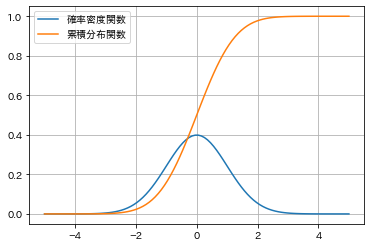

In [28]:
mu,sigma = 0,1
xscale = np.linspace(-5,5,100)

prob = stats.norm.pdf(xscale,mu,sigma)
cdf = stats.norm.cdf(xscale,mu,sigma)

plt.figure(facecolor="white")
plt.plot(xscale,prob,label="確率密度関数")
plt.plot(xscale,cdf,label="累積分布関数")
plt.legend()
plt.grid()
plt.show()

## Binomial distributionとNormal distributionの関係

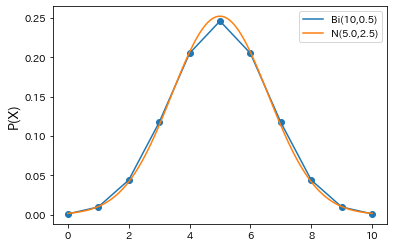

In [36]:
n,p = 10,0.5
xscaleBi = np.linspace(0,n,n+1)
xscaleN = np.linspace(0,n,(n+1)*10)

probBi = stats.binom.pmf(xscaleBi,n,p)
probN = stats.norm.pdf(xscaleN,n*p,np.sqrt(n*p*(1-p)))

plt.figure(facecolor="white")
plt.plot(xscaleBi,probBi,label="Bi("+str(n)+","+str(p)+")")
plt.scatter(xscaleBi,probBi)
plt.plot(xscaleN,probN,label="N("+str(n*p)+","+str(n*p*(1-p))+")")
plt.ylabel("P(X)",fontsize=13)
plt.legend()
plt.show()

## Poisson distributionとNormal distributionの関係

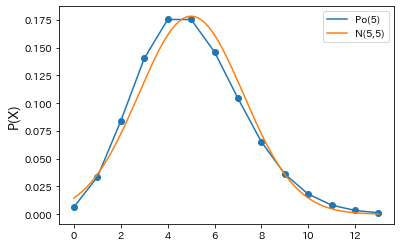

In [46]:
la=5 # lambda 
n=13 # 確率分布のパラメータではなく表示する試行回数

xscalePo = np.linspace(0,n,n+1)
xscaleN = np.linspace(0,n,(n+1)*10)

probPo = stats.poisson.pmf(xscalePo,la)
probN = stats.norm.pdf(xscaleN,la,np.sqrt(la))

plt.figure(facecolor="white")
plt.plot(xscalePo,probPo,label="Po("+str(la)+")")
plt.scatter(xscalePo,probPo)
plt.plot(xscaleN,probN,label="N("+str(la)+","+str(la)+")")
plt.ylabel("P(X)",fontsize=13)
plt.legend()
plt.show()